# The Big Three in the Australian Open Tournament - Data Analysis

This notebook is dedicated to analyze the famous tennis players Rafael Nadal, Novak Djokovic and Roger Federer in the Australian Open Grand Slam tournament. We are going to compare them against each other, as well as study their performance individually throughout the years ranging from 2012 to 2020.

Naturally, this notebook cannot be exhaustive because of the vast amounts of metrics and dimensions along which such analysis of performance can be made. Also, there is the clear disadvantage of dealing with limited data: only one tournament is considered in a restricted time window. However, by the end of the document we are going to have a clearer view of the successful career of these top-class tennis players.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading CSV files to kernel
match = pd.read_csv('../dataset/match.csv')
match_stats = pd.read_csv('../dataset/match_stats.csv')
set_score = pd.read_csv('../dataset/set_score.csv')
player = pd.read_csv('../dataset/player.csv')


In [3]:
# Displaying dataset metadata of each dataframe
print('MATCH INFO\n')
match.info()
print('\nMATCH STATISTICS\n')
match_stats.info()
print('\nSET STATISTICS\n')
set_score.info()
print('\nPLAYER LIST\n')
player.info()

MATCH INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  1143 non-null   int64  
 1   match_id                1143 non-null   int64  
 2   tournament_event_id     1143 non-null   int64  
 3   match_num               1143 non-null   int64  
 4   date                    1143 non-null   object 
 5   surface                 1143 non-null   object 
 6   indoor                  1143 non-null   object 
 7   round                   1143 non-null   object 
 8   best_of                 1143 non-null   int64  
 9   winner_id               1143 non-null   int64  
 10  winner_country_id       1143 non-null   object 
 11  winner_seed             678 non-null    float64
 12  winner_entry            61 non-null     object 
 13  winner_rank             1143 non-null   int64  
 14  winner_rank_points      1143

Our goal is to prune these datasets and just keep statistics 
of the players Rafael Nadal, Novak Djokovic and Roger Federer. First we remove unnecesary columns from each of the dataframes.

In [4]:
#Dropping columns from match dataframe. We will just keep 11 columns out of 38.

match = match[['match_id', 'season', 'match_num', 'round', 'winner_id', 'loser_id', 'score', 
               'w_sets', 'l_sets', 'w_games', 'l_games']]

match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   match_id   1143 non-null   int64 
 1   season     1143 non-null   int64 
 2   match_num  1143 non-null   int64 
 3   round      1143 non-null   object
 4   winner_id  1143 non-null   int64 
 5   loser_id   1143 non-null   int64 
 6   score      1143 non-null   object
 7   w_sets     1143 non-null   int64 
 8   l_sets     1143 non-null   int64 
 9   w_games    1143 non-null   int64 
 10  l_games    1143 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 98.4+ KB


In [5]:
# Dropping from match_stats dataframe. Almost all columns are relevant so we only drop two of them

match_stats.drop(columns=['set', 'minutes'], inplace=True)
match_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   match_id   1140 non-null   int64
 1   w_ace      1140 non-null   int64
 2   w_df       1140 non-null   int64
 3   w_sv_pt    1140 non-null   int64
 4   w_1st_in   1140 non-null   int64
 5   w_1st_won  1140 non-null   int64
 6   w_2nd_won  1140 non-null   int64
 7   w_sv_gms   1140 non-null   int64
 8   w_bp_sv    1140 non-null   int64
 9   w_bp_fc    1140 non-null   int64
 10  l_ace      1140 non-null   int64
 11  l_df       1140 non-null   int64
 12  l_sv_pt    1140 non-null   int64
 13  l_1st_in   1140 non-null   int64
 14  l_1st_won  1140 non-null   int64
 15  l_2nd_won  1140 non-null   int64
 16  l_sv_gms   1140 non-null   int64
 17  l_bp_sv    1140 non-null   int64
 18  l_bp_fc    1140 non-null   int64
dtypes: int64(19)
memory usage: 169.3 KB


In [6]:
# Getting the identifiers for each of the 3 players.
nadal = player.query("first_name == 'Rafael' and last_name == 'Nadal'")
djokovic = player.query("first_name == 'Novak' and last_name == 'Djokovic'")
federer = player.query("first_name == 'Roger' and last_name == 'Federer'")

nadal_id = nadal['player_id'].unique()[0]
djokovic_id = djokovic['player_id'].unique()[0]
federer_id = federer['player_id'].unique()[0]

# We do not need the player dataframe anymore, so we can delete it and free some space
del player

We are prepared to retain the records in the dataframes concerning only the matches where the three players considered participated.

In [7]:
matches_nadal = match.query("winner_id == @nadal_id or loser_id == @nadal_id")
matches_djokovic = match.query("winner_id == @djokovic_id or loser_id == @djokovic_id")
matches_federer = match.query("winner_id == @federer_id or loser_id == @federer_id")

Now we can sort the dataframes in chronological order and display them.

In [8]:
matches_nadal = matches_nadal.sort_values(by=['season', 'match_num'])
matches_nadal.head()
#matches_nadal # Uncomment to display the entire dataframe instead

,match_id,season,match_num,round,winner_id,loser_id,score,w_sets,l_sets,w_games,l_games
63,152982,2012,64,R128,4742,4861,6-4 6-1 6-1,3,0,18,6
95,153014,2012,96,R64,4742,3163,6-4 6-3 6-4,3,0,18,11
111,153030,2012,112,R32,4742,5034,6-2 6-4 6-2,3,0,18,8
119,153038,2012,120,R16,4742,3852,6-4 6-4 6-2,3,0,18,10
123,153042,2012,124,QF,4742,4606,6-7(5) 7-6(6) 6-4 6-3,3,1,24,19


Something that we can observe right away is that Nadal didn't play the AO in 2013. Looking on the internet, we find an article that confirms this (https://www.sbnation.com/2012/12/28/3811866/rafael-nadal-out-australian-open-2013). We can also see that in 2016 he lost in the first round, which was a notoriously tough event for him.

In [9]:
matches_djokovic = matches_djokovic.sort_values(by=['season', 'match_num'])
matches_djokovic.head()
#matches_djokovic # Uncomment to display the entire dataframe instead

,match_id,season,match_num,round,winner_id,loser_id,score,w_sets,l_sets,w_games,l_games
0,152919,2012,1,R128,4920,3893,6-2 6-0 6-0,3,0,18,2
64,152983,2012,65,R64,4920,5046,6-3 6-2 6-1,3,0,18,6
96,153015,2012,97,R32,4920,3917,6-0 6-1 6-1,3,0,18,2
112,153031,2012,113,R16,4920,3720,6-1 6-3 4-6 6-3,3,1,22,13
120,153039,2012,121,QF,4920,3970,6-4 7-6(4) 6-1,3,0,18,11


In [10]:
matches_federer = matches_federer.sort_values(by=['season', 'match_num'])
matches_federer.head()
# matches_federer # Uncomment to display the entire dataframe instead

,match_id,season,match_num,round,winner_id,loser_id,score,w_sets,l_sets,w_games,l_games
47,152966,2012,48,R128,3819,4627,7-5 6-2 6-2,3,0,19,9
87,153006,2012,88,R64,3819,4675,W/O,0,0,0,0
107,153026,2012,108,R32,3819,3333,7-6(6) 7-5 6-3,3,0,19,14
117,153036,2012,118,R16,3819,6057,6-4 6-2 6-2,3,0,18,8
122,153041,2012,123,QF,3819,5216,6-4 6-3 6-2,3,0,18,9


Now let's focus on building a simple visualization of each player's performance in the tournament throughout the years between 2012 and 2020 (included). We are going to do this first by plotting their position in the ranking each year.

In [11]:
# List of years in which this analysis is based
seasons = np.array(range(2012, 2021))

# We are going to retrieve a list of rounds in the AO tournament by using the dataframe of Nadal matches
rounds = np.array([roundd for roundd in matches_nadal['round'].unique()])
print(rounds)
n_rounds = rounds.shape[0]

# Dictionary mapping rounds to corresponding numbers from 1 to 8
rounds_dic = {roundd:(n + 1) for n, roundd in enumerate(rounds)}
print(rounds_dic)

# SIDENOTE: I've been using the label 'roundd' instead of 'round' for variables because the latter is a python's
# built-in function

['R128' 'R64' 'R32' 'R16' 'QF' 'SF' 'F']
{'R128': 1, 'R64': 2, 'R32': 3, 'R16': 4, 'QF': 5, 'SF': 6, 'F': 7}


In [12]:
# Simple function to get a 1D array of the farthest reached round each season  
def get_rounds(round_series):
    
    round_list = []
    prev_round = 0
    
    for roundd in round_series:
        
        if roundd == 'R128':
            round_list.append(prev_round)
        
        prev_round = rounds_dic[roundd]
    
    # Dropping first element (which is '') and adding last round of 2020
    round_list.append(prev_round)
    round_list.pop(0)
    
    return np.array(round_list)

rounds_nadal = get_rounds(matches_nadal['round'])
rounds_djokovic = get_rounds(matches_djokovic['round'])
rounds_federer = get_rounds(matches_federer['round'])

# In the case of Nadal, we must add a 0 for the missing year 2013.
rounds_nadal_list = list(rounds_nadal)
rounds_nadal_list.insert(1, 0)
rounds_nadal = np.array(rounds_nadal_list)
rounds_nadal

array([7, 0, 7, 5, 1, 7, 5, 7, 5])

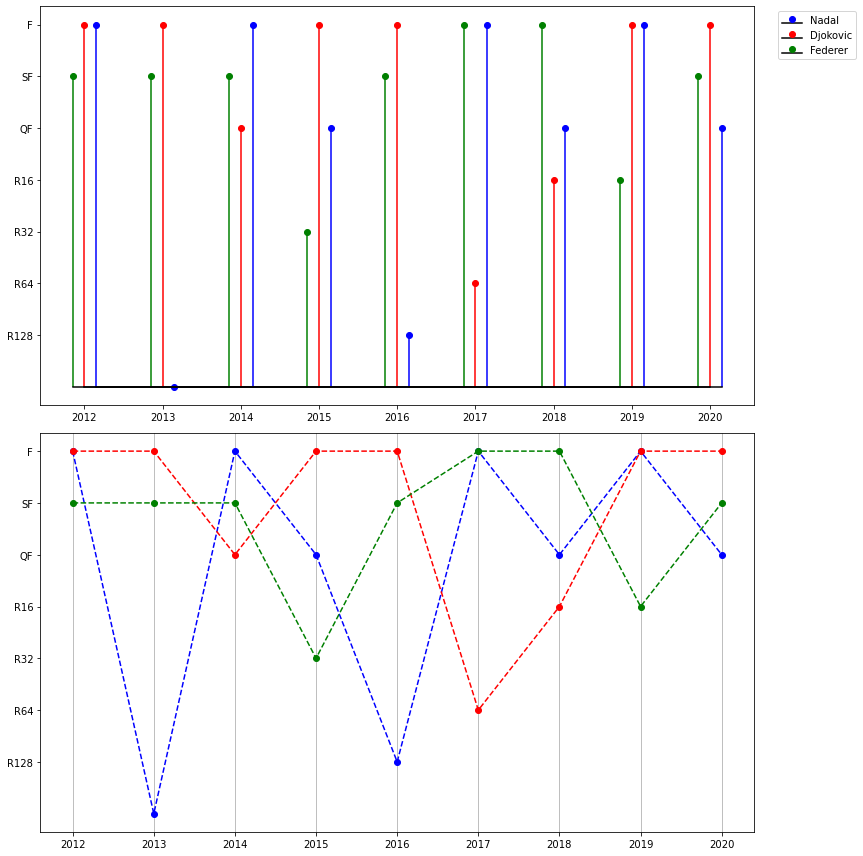

In [13]:
# Now we are prepared to plot the results. We are going to create two plots to make it clearer.

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

ax1.set_xticks(seasons)
ax1.set_yticks(range(1, 8))
ax1.set_yticklabels(rounds)
ax2.set_xticks(seasons)
ax2.set_yticks(range(1, 8))
ax2.set_yticklabels(rounds)

ax1.stem(seasons + 0.15, rounds_nadal, 'b', markerfmt='bo', basefmt='k', label='Nadal')
ax1.stem(seasons, rounds_djokovic, 'r', markerfmt='ro', basefmt='k', label='Djokovic')
ax1.stem(seasons - 0.15, rounds_federer, 'g', markerfmt='go',basefmt='k', label='Federer')

ax2.plot(seasons, rounds_nadal, '--bo')
ax2.plot(seasons, rounds_djokovic, '--ro')
ax2.plot(seasons, rounds_federer, '--go')
ax2.grid(axis='x')

ax1.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

fig.tight_layout()

From this, we can confirm that these 3 players have dominated this tournament throughout this years, with no clear victor. We could arguably say though, that Djokovic seems to have a little more success than the other two, with just a drop in dominance in 2017 and 2018.

Bear in mind that the plots, though informative, have the drawback that when one of the players reaches the final we cannot tell whether they won or not, just that they played it.

Now, we are going to analyze some metrics to see if there are some differences accross the Big Three.

In [14]:
# Function used to compute an aggregated measure accross the datasets.
def agr_metric(stats_df, match_df, metric, player_id, avg=True):

    stats_joined = pd.merge(match_df, stats_df, how='inner', on='match_id')

    total_w = stats_joined[stats_joined['winner_id'] == player_id]['w_' + metric].sum()
    total_l = stats_joined[stats_joined['loser_id'] == player_id]['l_' + metric].sum()
    total = total_w + total_l
    
    if avg: return total/stats_df.shape[0]
    else: return total

# Utility function to print results
def print_results(message, *scores):
    
    print(message + '\n'                       +
          'Nadal       {}\n'.format(scores[0]) +
          'Djokovic    {}\n'.format(scores[1]) +
          'Federer     {}\n'.format(scores[2]))

In [15]:
# First we need to get the necessary dataframes to use them in the previously defined function
nadal_stats = match_stats.query("match_id in @matches_nadal['match_id']")
matches_nadal_rel = matches_nadal[['match_id', 'winner_id', 'loser_id']]

djokovic_stats = match_stats.query("match_id in @matches_djokovic['match_id']")
matches_djokovic_rel = matches_djokovic[['match_id', 'winner_id', 'loser_id']]

federer_stats = match_stats.query("match_id in @matches_federer['match_id']")
matches_federer_rel = matches_federer[['match_id', 'winner_id', 'loser_id']]

# Let's calculate the average number of aces and double faults for each player
metrics = ['ace', 'df']

for metric in metrics:
    
    avg_nadal = agr_metric(nadal_stats, matches_nadal_rel,
                                  metric, nadal_id)
    avg_djokovic = agr_metric(djokovic_stats, matches_djokovic_rel,
                                     metric, djokovic_id)
    avg_federer = agr_metric(federer_stats, matches_federer_rel,
                                    metric, federer_id)
    
    print_results('AVERAGE ' + metric, avg_nadal, avg_djokovic, avg_federer)


AVERAGE ace
Nadal       5.4772727272727275
Djokovic    8.075471698113208
Federer     11.46

AVERAGE df
Nadal       2.3181818181818183
Djokovic    2.3962264150943398
Federer     2.24



With regards to the ace, we can see that Federer dominates with a considerable margin. He is in fact a well renown player for his deadly serving capabilities. We can also see that, despite this, he does not make more double faults than the other two, meaning that his remarkable ace statistics are due to skill and power more than to a tendency to risk faults.

Finally, let's see to what extent they dominate their serving points. To accomsplish this, we are going to calculate the proportion of serving points won against total serving points played for each player, but only on victorious matches. We only consider these matches to prevent variability due to differences in the ratio won games to lost games accross the three players.

In [16]:
# Nadal serving points
matches_nadal_rel_w = matches_nadal_rel[matches_nadal_rel['winner_id'] == nadal_id]
nadal_stats_w = nadal_stats.query("match_id in @matches_nadal_rel_w['match_id']")

first_won_nadal = agr_metric(nadal_stats_w, matches_nadal_rel_w,
                             '1st_won', nadal_id, avg=False)
second_won_nadal = agr_metric(nadal_stats_w, matches_nadal_rel_w,
                              '2nd_won', nadal_id, avg=False)

sv_pts_nadal = first_won_nadal + second_won_nadal

# Djokovic serving points
matches_djokovic_rel_w = matches_djokovic_rel[matches_djokovic_rel['winner_id'] == djokovic_id]
djokovic_stats_w = djokovic_stats.query("match_id in @matches_djokovic_rel_w['match_id']")

first_won_djokovic = agr_metric(djokovic_stats_w, matches_djokovic_rel_w,
                               '1st_won', djokovic_id, avg=False)
second_won_djokovic = agr_metric(djokovic_stats_w, matches_djokovic_rel_w,
                                 '2nd_won', djokovic_id, avg=False)

sv_pts_djokovic = first_won_djokovic + second_won_djokovic

# Federer serving points
matches_federer_rel_w = matches_federer_rel[matches_federer_rel['winner_id'] == federer_id]
federer_stats_w = federer_stats.query("match_id in @matches_federer_rel_w['match_id']")

first_won_federer = agr_metric(federer_stats_w, matches_federer_rel_w,
                               '1st_won', federer_id, avg=False)
second_won_federer = agr_metric(federer_stats_w, matches_federer_rel_w,
                                '2nd_won', federer_id, avg=False)

sv_pts_federer = first_won_federer + second_won_federer

# Now we can compute the desired metric.

# Nadal proportion
total_sv_pts_nadal = agr_metric(nadal_stats_w, matches_nadal_rel_w,
                                'sv_pt', nadal_id, avg=False)

prop_sv_pts_nadal = sv_pts_nadal / total_sv_pts_nadal

# Djokovic proportion
total_sv_pts_djokovic  = agr_metric(djokovic_stats_w, matches_djokovic_rel_w,
                                    'sv_pt', djokovic_id, avg=False)

prop_sv_pts_djokovic = sv_pts_djokovic  / total_sv_pts_djokovic 

# Federer proportion
total_sv_pts_federer = agr_metric(federer_stats_w, matches_federer_rel_w,
                                'sv_pt', federer_id, avg=False)

prop_sv_pts_federer = sv_pts_federer  / total_sv_pts_federer

# Finally, printing the results using our previously defined function
message = 'PROPORTION OF SERVING POINTS WON AGAINST TOTAL POINTS PLAYED ACCROSS WON MATCHES\n'
print_results(message, prop_sv_pts_nadal, prop_sv_pts_djokovic, prop_sv_pts_federer)

PROPORTION OF SERVING POINTS WON AGAINST TOTAL POINTS PLAYED ACCROSS WON MATCHES

Nadal       0.7160383004189108
Djokovic    0.7161192081792473
Federer     0.7268041237113402



We observe no big difference among the Big Three in this regard. 